In [95]:
import geopandas
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import bokeh
from bokeh.models import ColumnDataSource

In [96]:
#Read SHP file and convert it into a format that the lib GeoPlot can understand
def read_shp_file_for_geoplot(file_directory):
    zone = geopandas.read_file(file_directory)
    zone = zone.to_crs(epsg=4326)
    return zone

#Retrieved from: https://automating-gis-processes.github.io/2016/Lesson5-interactive-map-bokeh.html
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y
    
#Retrieved from: https://automating-gis-processes.github.io/2016/Lesson5-interactive-map-bokeh.html    
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [88]:
singapore_subzone = read_shp_file_for_geoplot("shp/singapore-subzone/singapore_region.shp")
singapore_subzone.head()

,OBJECTID,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,CENTRAL REGION,CR,F6D4903B6C0B72F8,2016-05-11,27836.5573,31929.9186,131065.464453,1.364056e+08,(POLYGON ((103.8487496535366 1.363027350968694...
1,2,EAST REGION,ER,646F1B60DAFE0282,2016-05-11,42245.8477,36760.4998,60375.722057,1.129697e+08,"(POLYGON ((103.9532163552991 1.38201544874088,..."
2,3,NORTH REGION,NR,3B51FFC82787B16B,2016-05-11,23647.9008,44176.7871,87426.777164,1.394056e+08,(POLYGON ((103.7766443371783 1.451449550733884...
3,4,NORTH-EAST REGION,NER,21277DA34DEE03B8,2016-05-11,41561.9228,41689.7948,106583.903458,1.360536e+08,(POLYGON ((103.8971485843472 1.415018424469598...
4,5,WEST REGION,WR,11540153B663CA9B,2016-05-11,12896.4360,33986.5714,258264.026231,2.571103e+08,(POLYGON ((103.6972910137682 1.307543927147306...


In [89]:
schools = read_shp_file_for_geoplot("shp/schools.shp")
schools.head()

schools['x'] = schools.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
schools['y'] = schools.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

,SCH_NAME,POS_CODE,geometry
0,NATIONAL JUNIOR COLLEGE,288913,POINT (103.8044587137851 1.330429928007572)
1,TEMASEK JUNIOR COLLEGE,469278,POINT (103.9355979700891 1.31846190599677)
2,VICTORIA JUNIOR COLLEGE,449035,POINT (103.9195310333307 1.30571796549431)
3,EUNOIA JUNIOR COLLEGE,276880,POINT (103.7864411329573 1.313744964742761)
4,ANDERSON SERANGOON JUNIOR COLLEGE,569843,POINT (103.845885968342 1.378396709725451)


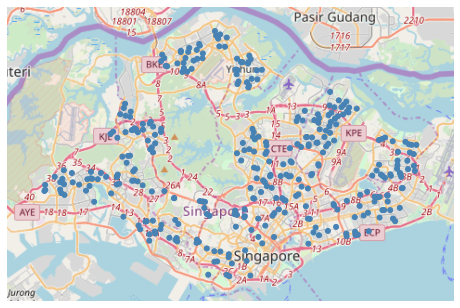

In [94]:
ax = gplt.webmap(singapore_subzone)
gplt.pointplot(schools,ax=ax)

In [ ]:
p_df = schools.drop('geometry', axis=1).copy()
psource = ColumnDataSource(p_df)